# Proyek Analisis Data: Bikes Sharing dataset/hour
- **Nama:** Ridwan Fadillah
- **Email:** ridwangithub@gmail.com
- **ID Dicoding:** ridwanfadillah

## Menentukan Pertanyaan Bisnis

- Bagaimana Pengaruh kondisi cuaca terhadap jumlah pemijnjaman sepeda?
- Bagaimana variasi jumlah peminjaman sepeda berdasarkan jam dalam sehari

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [3]:
bikes_df = pd.read_csv('data/hour.csv')
bikes_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Mengimport semua library yang diperlukan
- Membaca csv bike sharing dataset/hour

### Assessing Data

In [3]:
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [4]:
bikes_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [5]:
print('Jumlah duplikasi: ', bikes_df.duplicated().sum())

Jumlah duplikasi:  0


In [6]:
bikes_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Dataset tidak mengalami missing value
- tidak ada data duplikat yang ditemukan
- Data type sudah sesuai

### Cleaning Data

In [7]:
# check outlier
Q1 = bikes_df['cnt'].quantile(0.25)
Q3 = bikes_df['cnt'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for the outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify the outliers
outliers = bikes_df[(bikes_df['cnt'] < lower_bound) | (bikes_df['cnt'] > upper_bound)]
outliers.style.background_gradient(cmap='Greys')

In [9]:
#removing outliers
bikes_df = bikes_df[(bikes_df['cnt'] >= lower_bound) & (bikes_df['cnt'] <= upper_bound)]
print("shape after outliers removal :",bikes_df.shape)

shape after outliers removal : (16874, 17)


**Insight:**
- Dilakukan pengecekan outlier
- menghapus semua outlier

## Exploratory Data Analysis (EDA)

### Explore ...

In [10]:
bikes_df.describe(include='all')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,16874.000000,16874,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000,16874.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8542.168899,NaN,2.490399,0.487733,6.513275,11.458101,0.029513,2.997748,0.678618,1.430663,0.492650,0.471970,0.630412,0.189619,33.418632,139.291514,172.710146
std,5007.766040,NaN,1.111966,0.499864,3.462438,6.962144,0.169244,2.013054,0.467021,0.642689,0.192455,0.171878,0.192600,0.122460,45.896591,126.052802,155.020918
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4219.250000,NaN,1.000000,0.000000,4.000000,5.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,32.000000,38.000000
50%,8438.500000,NaN,2.000000,0.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.179100,15.000000,111.000000,135.000000
75%,12832.750000,NaN,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.640000,0.621200,0.790000,0.253700,45.000000,208.000000,265.750000


In [15]:
weather_rentals = bikes_df.groupby(['weathersit'])['cnt'].mean().reset_index()
weather_conditions = {
    1: 'Clear/Partly cloudy',
    2: 'Mist/Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}

weather_rentals['weathersit'] = weather_rentals['weathersit'].map(weather_conditions)
weather_rentals

,weathersit,cnt
0,Clear/Partly cloudy,185.314247
1,Mist/Cloudy,162.626463
2,Light Snow/Rain,106.050462
3,Heavy Rain/Snow,74.333333


In [16]:
hourly_rentals = bikes_df.groupby(['hr'])['cnt'].mean().reset_index()
hourly_rentals

,hr,cnt
0,0,53.898072
1,1,33.375691
2,2,22.869930
3,3,11.727403
4,4,6.352941
5,5,19.889819
6,6,76.044138
7,7,212.064649
8,8,284.525000
9,9,219.309491


**Insight:**
- Mengelompokan data berdasarkan kondisi cuaca
- Menglompokan data berdasarkan jumlah jam peminjaman dalam sehari

## Visualization & Explanatory Analysis

### Pertanyaan 1:

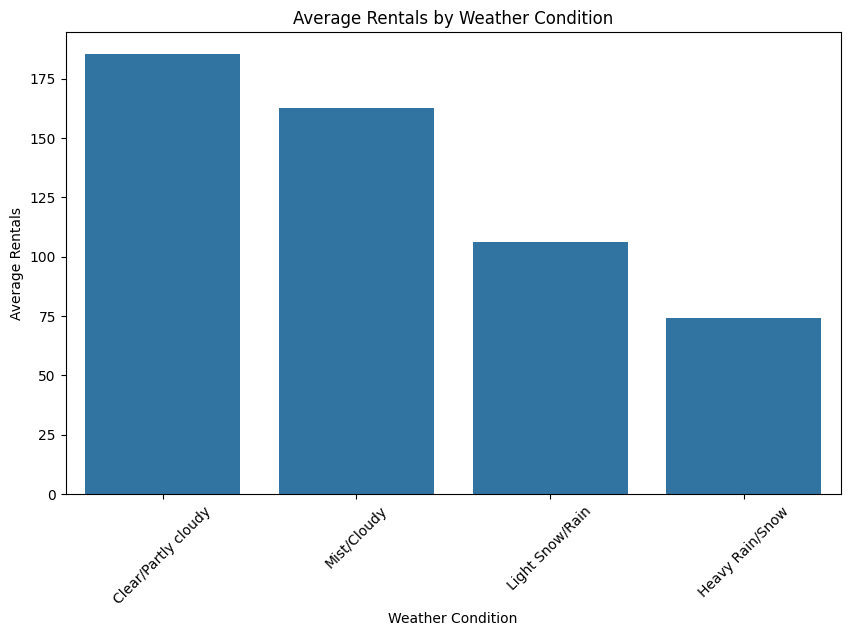

In [17]:
plt.figure(figsize=(10, 6))
sns.barplot(x='weathersit', y='cnt', data=weather_rentals)
plt.title('Average Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Rentals')
plt.xticks(rotation=45)
plt.show()

### Pertanyaan 2:

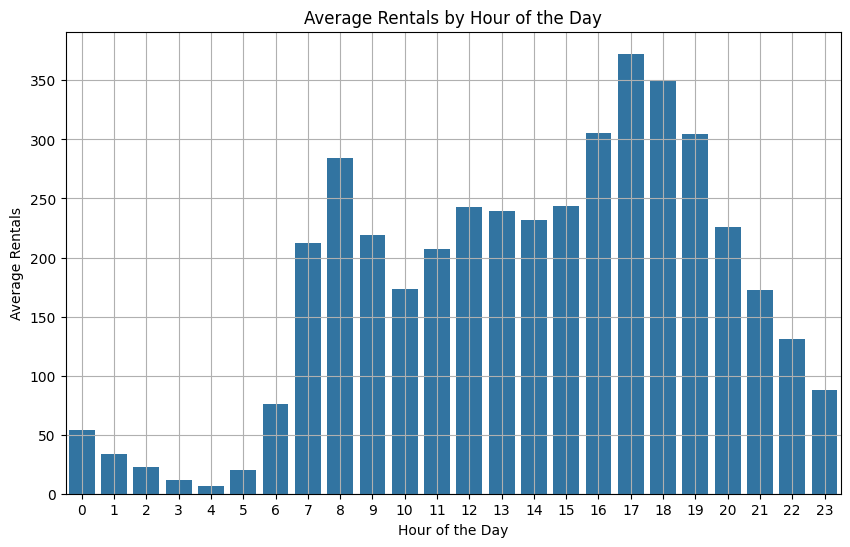

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='hr', y='cnt', data=hourly_rentals)
plt.title('Average Rentals by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.xticks(range(0, 24,1))
plt.grid(True)
plt.show()

**Insight:**
- Didapatkan bahwa rata-rata rental sepeda meningkat ketika cuaca cerah
- Didapatkan bahwa peminjaman sepeda mengalami peningkatan pada pagi hari dan sore hari dan mengalami penurunan ketika jam 20 malam dan tengah malam hingga jam 6 pagi

## Analisis Lanjutan (Opsional)

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


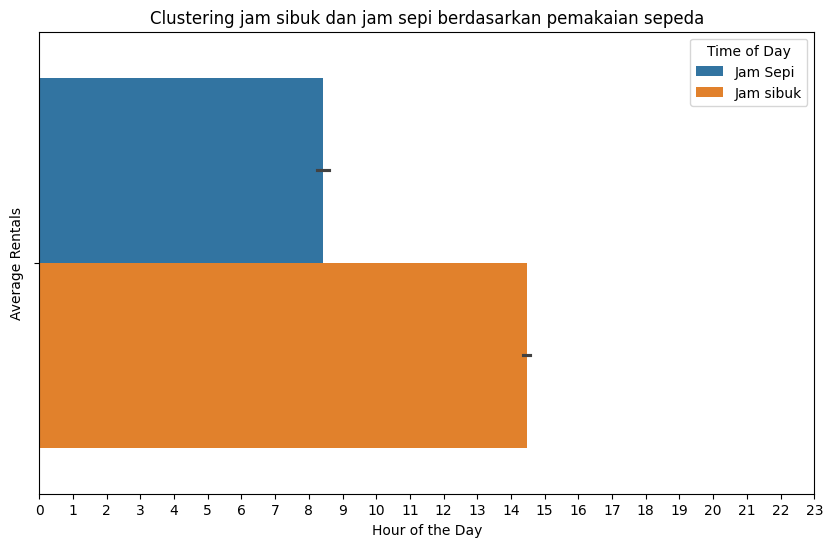

In [24]:
#Clustering Manual
median_rentals = bikes_df['cnt'].median()
#kolom baru yang mengkategorikn jam sebagai 'jam sibuk' atau 'Jam sepi'
bikes_df['time_of_day'] = bikes_df['cnt'].apply(lambda x: 'Jam sibuk' if x >= median_rentals else 'Jam Sepi')

plt.figure(figsize=(10, 6))
sns.barplot(x='hr', hue='time_of_day', data=bikes_df)
plt.title('Clustering jam sibuk dan jam sepi berdasarkan pemakaian sepeda')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rentals')
plt.xticks(range(0, 24, 1))
plt.legend(title='Time of Day', loc='upper right')
plt.show()

## Conclusion

- Pengaruh kondisi cuaca
  - Cuaca cerah atau berawan memiliki jumlah peminjaman sepeda paling tinggi, yang berarti kondisi cuaca baik signifikan meningkatkan minat pengguna untuk menyewa sepeda.
  - Saat cuaca berkabut atau mendung, jumlah peminjaman mulai menurun dan semakin berkurang saat terjadi hujan atau salju ringan.
  - Saat cuaca Hujan atau salju lebat memiliki angka peminjaman yang relatif paling rendah dari semua cuaca yang berarti kondisi cuaca buruk sangat mengurangi penggunaan sepeda sepeda
- Variasi peminjaman sepeda berdasarkan jam
  - Jam sibuk untuk peminjaman sepeda terjadi pada pagi hari (sekitar jam 7--9) dan sore hari (sekitar jam 17-19), yang kemnungkinan disebabkan karena orang orang yang menggunakan sepeda untuk pergi dan pulang kerja
  - Jam sepi (setelah jam 20 dan sebelum jam 6) menunjukan penurunan tajam dalam penggunaan sepeda, disebabkan karena berkurang nya aktivitas perjalanan di malam hari.

In [25]:
bikes_df.to_csv("main_data.csv", index=False)